In [1]:
!pip install shap

Calculando SHAP para Random Forest... (pode demorar)


  0%|          | 0/76 [00:00<?, ?it/s]

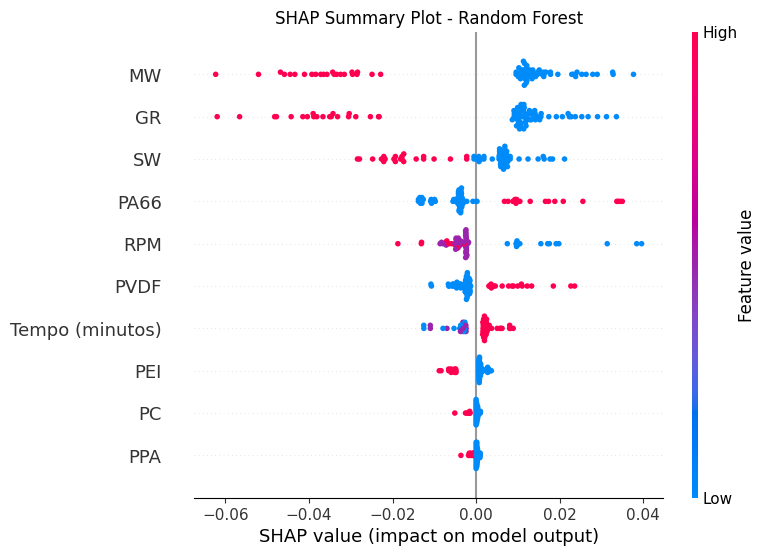

Calculando SHAP para MLP... (pode demorar)


  0%|          | 0/76 [00:00<?, ?it/s]

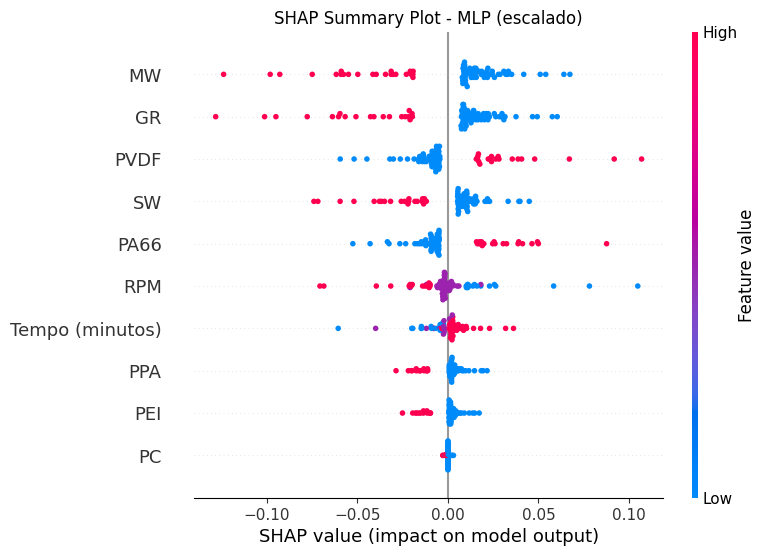

In [2]:
# Instalação
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Carrega o DataFrame
df = pd.read_excel("DataFrame_unificado_one_hot.xlsx")

# 2. Define X e y
target_col = "Resposta(S/cm)"
X = df.drop(columns=[target_col])
y = df[target_col]
feature_names = X.columns.tolist()

# 3. Aplica StandardScaler (apenas para MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Carrega os modelos
mlp_model = joblib.load("best_mlp_model.joblib")
rf_model = joblib.load("best_random_forest_model.joblib")

# 5. Função SHAP para qualquer modelo
def shap_kernel_plot(model, model_name, X_data, scaled=False):
    print(f"Calculando SHAP para {model_name}... (pode demorar)")
    n_amostras = min(100, len(X_data))
    background = X_data[:n_amostras]
    test_sample = X_data[:n_amostras]

    explainer = shap.KernelExplainer(model.predict, background)
    shap_values = explainer.shap_values(test_sample)

    shap.summary_plot(shap_values, test_sample, feature_names=feature_names, plot_type="dot", show=False)
    title_suffix = " (escalado)" if scaled else ""
    plt.title(f"SHAP Summary Plot - {model_name}{title_suffix}")
    plt.show()

# 6. SHAP para Random Forest (sem escala)
shap_kernel_plot(rf_model, "Random Forest", X.to_numpy(), scaled=False)

# 7. SHAP para MLP (com escala)
shap_kernel_plot(mlp_model, "MLP", X_scaled, scaled=True)


In [3]:
import shap
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Carrega o DataFrame
df = pd.read_excel("Dataset_ingles.xlsx")

# 2. Define X e y
target_col = "Resposta(S/cm)"
X = df.drop(columns=[target_col])
y = df[target_col]
feature_names = X.columns.tolist()

# 3. Aplica StandardScaler (apenas para MLP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Carrega os modelos
mlp_model = joblib.load("best_mlp_model.joblib")
rf_model = joblib.load("best_random_forest_model.joblib")

# 5. Função SHAP para qualquer modelo (usando todos os dados e salvando gráfico)
def shap_kernel_plot(model, model_name, X_data, scaled=False):
    print(f"Calculando SHAP para {model_name} com {len(X_data)} amostras...")

    background = X_data  # usa todos os dados
    test_sample = X_data

    explainer = shap.KernelExplainer(model.predict, background)
    shap_values = explainer.shap_values(test_sample)

    shap.summary_plot(shap_values, test_sample, feature_names=feature_names, plot_type="dot", show=False)

    title_suffix = "_escalado" if scaled else ""
    output_file = f"shap_{model_name.replace(' ', '_').lower()}{title_suffix}.png"
    plt.title(f"SHAP Summary Plot - {model_name}")
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"Gráfico salvo como: {output_file}")

# 6. SHAP para Random Forest (sem escala)
shap_kernel_plot(rf_model, "Random Forest", X.to_numpy(), scaled=False)

# 7. SHAP para MLP (com escala)
shap_kernel_plot(mlp_model, "MLP", X_scaled, scaled=True)


Calculando SHAP para Random Forest com 76 amostras...


  0%|          | 0/76 [00:00<?, ?it/s]

Gráfico salvo como: shap_random_forest.png
Calculando SHAP para MLP com 76 amostras...


  0%|          | 0/76 [00:00<?, ?it/s]

Gráfico salvo como: shap_mlp_escalado.png
